In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 1.7 MB/s eta 0:00:05
                                              0.2/7.6 MB 2.1 MB/s eta 0:00:04
     -                                        0.3/7.6 MB 2.2 MB/s eta 0:00:04
     --                                       0.4/7.6 MB 2.2 MB/s eta 0:00:04
     --                                       0.5/7.6 MB 2.1 MB/s eta 0:00:04
     --                                       0.6/7.6 MB 2.1 MB/s eta 0:00:04
     ---                                      0.7/7.6 MB 2.2 MB/s eta 0:00:04
     ----                                     0.8/7.6 MB 2.1 MB/s eta 0:00:04
     ----                                     0.9/7.6 MB 2.1 MB/s eta 0:00:04
     -----                                    1.0/7.6 MB 2.1 MB/s eta 0:00:04
     -----                                    1.1/7.6 MB 2.1 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

C:\Users\daniel\AppData\Local\Temp\ipykernel_19588\4009471858.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Climate Dimension

Boxplots for Attributes
•	Mean_Temp 
•	Max_Temp
•	Snowfall
•	Total_Precip

In [4]:
climate_df = pd.read_csv("datasets\climate_dimension.csv")

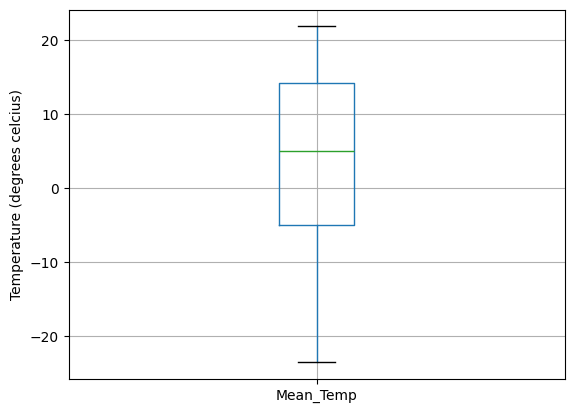

In [12]:
axes = climate_df.boxplot(column='Mean_Temp')
axes.set_ylabel('Temperature (degrees Celcius)')
plt.show()

In [4]:
fact_df = pd.read_csv("datasets/cropFactTable.csv")

prices = fact_df['Price']
volumes = fact_df['Volume']
value = fact_df['Total_Value']

{'whiskers': [<matplotlib.lines.Line2D at 0x22e22514850>,
 'caps': [<matplotlib.lines.Line2D at 0x22e225165d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e2250f590>],
 'medians': [<matplotlib.lines.Line2D at 0x22e22540050>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e22540c10>],
 'means': []}

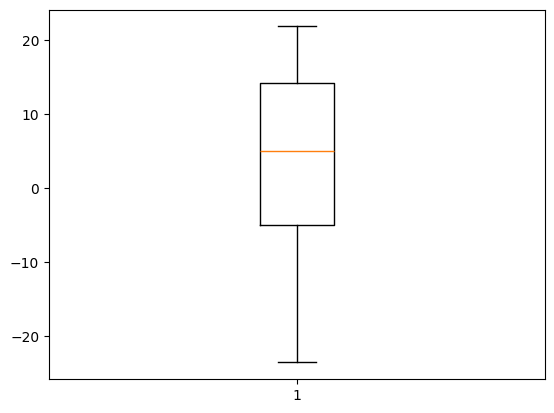

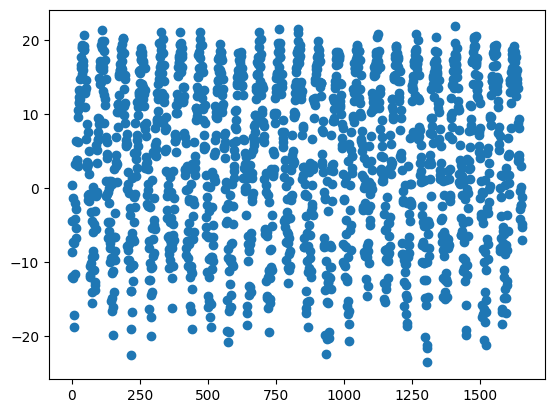

In [16]:
ids = climate_df['Unnamed: 0']
plt.scatter(ids,mean_temp)